## Implement Five-fold Cross Validation for Model Selection from Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Generate N=100 data points

Text(0.5, 1.0, 'Y= 1 + X + 3*X**2 + noise')

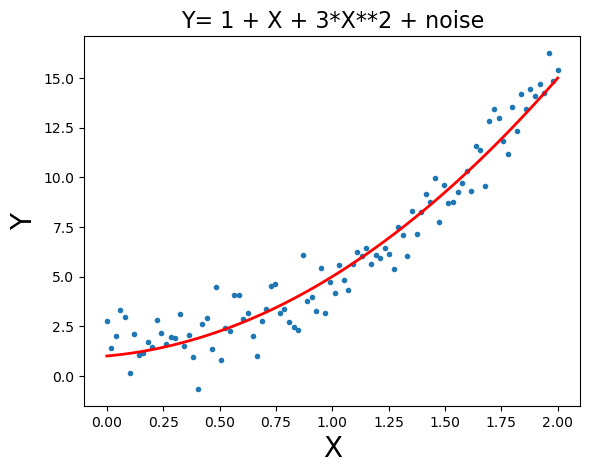

In [2]:
N=100
X = np.linspace(0, 2, N).reshape(N,1) 
Y_best = 1 + X + 3*X**2
rng = np.random.RandomState(0)
Y = Y_best + rng.randn(N, 1)
#
fig, ax = plt.subplots()
ax.plot(X, Y,'.') 
ax.plot(X, Y_best,'-r', linewidth=2)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_title("Y= 1 + X + 3*X**2 + noise", fontsize=16)

### Split the dataset into a training dataset (50%) and a testing dataset (50%)

Text(0.5, 1.0, 'testing data points  (50%)')

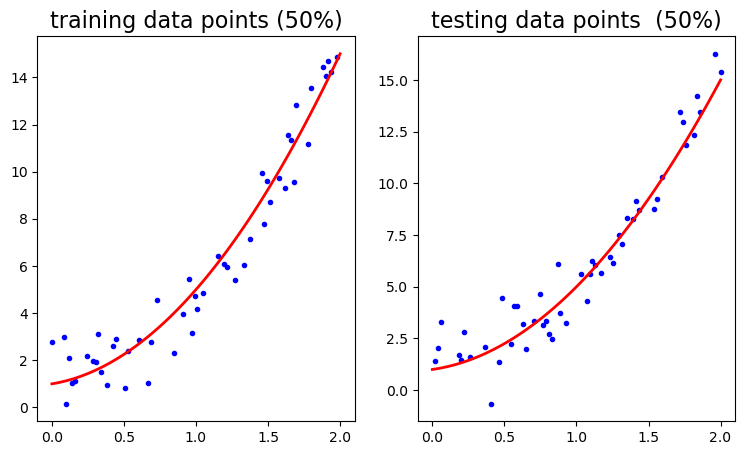

In [3]:
idxlist = np.arange(0, N,1)
rng.shuffle(idxlist)
X_train = X[idxlist[0:N//2],:]
Y_train = Y[idxlist[0:N//2],:]
X_test = X[idxlist[N//2:],:]
Y_test = Y[idxlist[N//2:],:]
fig, ax = plt.subplots(1,2, figsize=(9,5))
ax[0].plot(X_train, Y_train,'.b')
ax[0].plot(X, Y_best,'-r', linewidth=2)
ax[0].set_title('training data points (50%)', fontsize=16)
ax[1].plot(X_test, Y_test,'.b')
ax[1].plot(X, Y_best,'-r', linewidth=2)
ax[1].set_title('testing data points  (50%)', fontsize=16)

### Perform Five-fold Cross Validation to find the optimal degree of the polynomial model

In [4]:
Y_train.shape

(50, 1)

In [5]:
N_train=Y_train.shape[0]
N_train

50

In [6]:
index_list_all=np.arange(0, N_train)
index_list_all

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [7]:
#validation set-0, 10 samples in each valiation set
n=0
index_list_val=np.arange(n*(N_train//5), (n+1)*(N_train//5))
index_list_val

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
index_list_train=np.array(list(set(index_list_all)-set(index_list_val)))
index_list_train

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

In [9]:
degree_list=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
MSE_avg_train_list=[]
MSE_avg_val_list=[]
for deg in degree_list:
    MSE_tra=np.zeros(5)
    MSE_val=np.zeros(5) 
    index_list_all=np.arange(0, N_train)
    for n in range(0, 5):
        index_list_val=np.arange(n*(N_train//5), (n+1)*(N_train//5))
        index_list_train=list(set(index_list_all)-set(index_list_val))
        #validation set-n
        X_val_n = X_train[index_list_val]
        Y_val_n = Y_train[index_list_val]
        #training set-n
        X_train_n = X_train[index_list_train]
        Y_train_n = Y_train[index_list_train] 
        model = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression())
        model.fit(X_train_n, Y_train_n)   
        Yp_train_n = model.predict(X_train_n)
        Yp_val_n = model.predict(X_val_n)        
        MSE_tra[n] = np.mean((Y_train_n - Yp_train_n)**2)
        MSE_val[n] = np.mean((Y_val_n - Yp_val_n)**2)        
    MSE_avg_train_list.append(np.mean(MSE_tra))
    MSE_avg_val_list.append(np.mean(MSE_val))

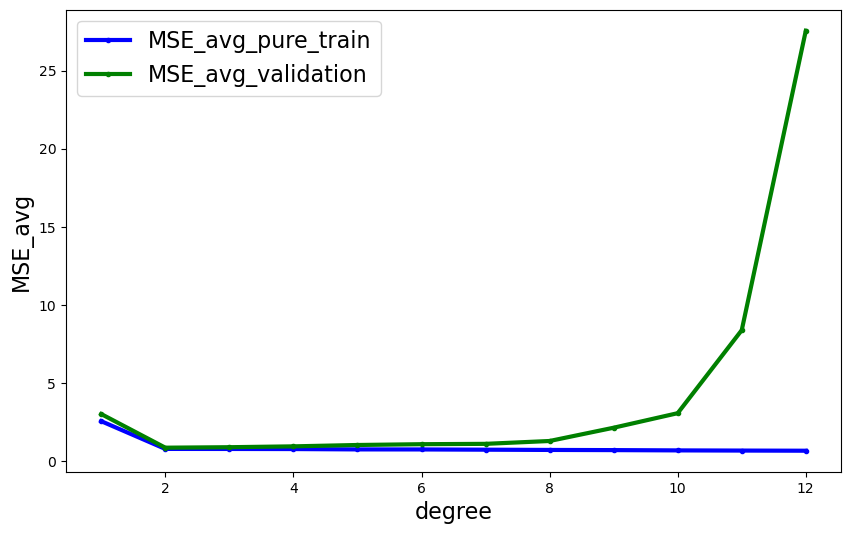

In [10]:
#show
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.plot(degree_list, MSE_avg_train_list, '.-b', linewidth=3, label = 'MSE_avg_pure_train')
ax.plot(degree_list, MSE_avg_val_list, '.-g', linewidth=3, label = 'MSE_avg_validation')
ax.set_xlabel('degree', fontsize=16)
ax.set_ylabel('MSE_avg', fontsize=16)
ax.legend(loc='best', fontsize=16)
#ax.axis([0, 12, 0, 50])

We should select the degree at which  MSE_avg_val is the lowest

In [11]:
degree_list[np.argmin(MSE_avg_val_list)]

2